In [1]:
from pathlib import Path

import numpy as np
import pandas
import polaris
import seaborn as sns

/data1/choderaj/kaminowb/micromamba/envs/polaris_challenge/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
competition = polaris.load_competition("asap-discovery/antiviral-potency-2025")
competition.cache()

[2025-03-12 13:55:47] INFO     The version of Polaris that was used to create the artifact (0.11.0) ]8;id=398933;file:///data1/choderaj/kaminowb/micromamba/envs/polaris_challenge/lib/python3.12/site-packages/polaris/_artifact.py\_artifact.py]8;;\:]8;id=691748;file:///data1/choderaj/kaminowb/micromamba/envs/polaris_challenge/lib/python3.12/site-packages/polaris/_artifact.py#92\92]8;;\
                               is different from the currently installed version of Polaris                        
                               (0.11.9).                                                                           

                      WARNING  You're loading data from a remote location. If the dataset is small     ]8;id=581305;file:///data1/choderaj/kaminowb/micromamba/envs/polaris_challenge/lib/python3.12/site-packages/polaris/dataset/_base.py\_base.py]8;;\:]8;id=300802;file:///data1/choderaj/kaminowb/micromamba/envs/polaris_challenge/lib/python3.12/site-packages/polaris/dataset/_base.py#181\181]8;;\
                               enough, consider caching the dataset first using                                    
                               CompetitionSpecification.cache() for more performant data access.                   

/data1/choderaj/kaminowb/micromamba/envs/polaris_challenge/lib/python3.12/site-packages/rich/live.py:231: 
UserWarning: install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

[13:55:47] Copying to destination                                                                      ]8;id=498468;file:///data1/choderaj/kaminowb/micromamba/envs/polaris_challenge/lib/python3.12/site-packages/polaris/dataset/_base.py\_base.py]8;;\:]8;id=878809;file:///data1/choderaj/kaminowb/micromamba/envs/polaris_challenge/lib/python3.12/site-packages/polaris/dataset/_base.py#380\380]8;;\
           /home/kaminowb/.cache/polaris/datasets/5b2836e2-4bc8-442b-b161-19d0dc2753a0/data.zarr                   

           For large Zarr archives, this may take a while.                                             ]8;id=103282;file:///data1/choderaj/kaminowb/micromamba/envs/polaris_challenge/lib/python3.12/site-packages/polaris/dataset/_base.py\_base.py]8;;\:]8;id=357525;file:///data1/choderaj/kaminowb/micromamba/envs/polaris_challenge/lib/python3.12/site-packages/polaris/dataset/_base.py#381\381]8;;\

[13:55:50]  Success: Copying Zarr keys                                                                ]8;id=976864;file:///data1/choderaj/kaminowb/micromamba/envs/polaris_challenge/lib/python3.12/site-packages/polaris/utils/context.py\context.py]8;;\:]8;id=156337;file:///data1/choderaj/kaminowb/micromamba/envs/polaris_challenge/lib/python3.12/site-packages/polaris/utils/context.py#53\53]8;;\

            Success: Copying Zarr archive                                                             ]8;id=536018;file:///data1/choderaj/kaminowb/micromamba/envs/polaris_challenge/lib/python3.12/site-packages/polaris/utils/context.py\context.py]8;;\:]8;id=115880;file:///data1/choderaj/kaminowb/micromamba/envs/polaris_challenge/lib/python3.12/site-packages/polaris/utils/context.py#53\53]8;;\

'/home/kaminowb/.cache/polaris/datasets/5b2836e2-4bc8-442b-b161-19d0dc2753a0'

In [3]:
train, test_smi = competition.get_train_test_split()

In [5]:
test_smi[0]

'C=CC(=O)NC1=CC=CC(N(CC2=CC=CC(Cl)=C2)C(=O)CC2=CN=CC3=CC=CC=C23)=C1'

In [8]:
list(test_smi)

['C=CC(=O)NC1=CC=CC(N(CC2=CC=CC(Cl)=C2)C(=O)CC2=CN=CC3=CC=CC=C23)=C1',
 'CNC(=O)CN1C[C@@]2(C(=O)N(C3=CN=CC4=CC=CC=C34)C[C@@H]2C)C2=C(C=CC(F)=C2)C1=O',
 'CNC(=O)CN1C[C@]2(CCN(C3=CN=CC4=CC=C(OC[C@H](O)CN(C)C)C=C34)C2=O)C2=CC(Cl)=CC=C2C1=O |&1:7,&2:21|',
 'CNC(=O)CN1C[C@@]2(C(=O)N(C3=CN=CC4=CC=CC=C34)C[C@@H]2C)C2=CC=CC=C2C1=O',
 'CNC(=O)CN1C[C@@]2(C(=O)N(C3=CN=CC4=CC=CC=C34)C[C@@H]2C)C2=CC(Cl)=CC=C2C1=O',
 'CNC(=O)CN1C[C@]2(C(=O)N(C3=CN=CC4=CC=CC=C34)C[C@H]2CC2CC2)C2=CC(Cl)=CC=C2C1=O |o1:7,22|',
 'C[C@H]1CN(C2=CN=CC3=CC=CC=C23)C(=O)[C@@]12CN(CC(=O)NCC1=CC=NN1C)C(=O)C1=CC=C(Cl)C=C12',
 'C[C@H]1CN(C2=CN=CC3=CC=CC=C23)C(=O)[C@@]12CN(CC(=O)NCC1=NN(C)C=C1)C(=O)C1=CC=C(Cl)C=C12',
 'CO[C@@H](C)CN1C[C@H](C(=O)NC2=CN=CC3=CC=CC=C23)C2=CC(Cl)=CC=C2C1=O |o1:7|',
 'CN[C@H](C)CN1C[C@H](C(=O)NC2=CN=CC3=CC=CC=C23)C2=CC(Cl)=CC=C2C1=O |&1:7|',
 'CN1C(=O)C2=CC=C(Cl)C=C2[C@]12CCCN(C1=CN=CC3=CC=CC=C13)C2=O |&1:11|',
 'CCNC(=O)CN1C[C@@]2(C(=O)N(C3=CN=CC4=CC=CC=C34)C[C@@H]2C)C2=CC(Cl)=CC=C2C1=O',
 'C[C@H]1CN(C2

In [12]:
smi_path = Path("../raw_data/potency/test_smi.smi")
loaded_test_smi = smi_path.read_text().split("\n")
loaded_test_smi[:10]

['C=CC(=O)NC1=CC=CC(N(CC2=CC=CC(Cl)=C2)C(=O)CC2=CN=CC3=CC=CC=C23)=C1',
 'CNC(=O)CN1C[C@@]2(C(=O)N(C3=CN=CC4=CC=CC=C34)C[C@@H]2C)C2=C(C=CC(F)=C2)C1=O',
 'CNC(=O)CN1C[C@]2(CCN(C3=CN=CC4=CC=C(OC[C@H](O)CN(C)C)C=C34)C2=O)C2=CC(Cl)=CC=C2C1=O |&1:7,&2:21|',
 'CNC(=O)CN1C[C@@]2(C(=O)N(C3=CN=CC4=CC=CC=C34)C[C@@H]2C)C2=CC=CC=C2C1=O',
 'CNC(=O)CN1C[C@@]2(C(=O)N(C3=CN=CC4=CC=CC=C34)C[C@@H]2C)C2=CC(Cl)=CC=C2C1=O',
 'CNC(=O)CN1C[C@]2(C(=O)N(C3=CN=CC4=CC=CC=C34)C[C@H]2CC2CC2)C2=CC(Cl)=CC=C2C1=O |o1:7,22|',
 'C[C@H]1CN(C2=CN=CC3=CC=CC=C23)C(=O)[C@@]12CN(CC(=O)NCC1=CC=NN1C)C(=O)C1=CC=C(Cl)C=C12',
 'C[C@H]1CN(C2=CN=CC3=CC=CC=C23)C(=O)[C@@]12CN(CC(=O)NCC1=NN(C)C=C1)C(=O)C1=CC=C(Cl)C=C12',
 'CO[C@@H](C)CN1C[C@H](C(=O)NC2=CN=CC3=CC=CC=C23)C2=CC(Cl)=CC=C2C1=O |o1:7|',
 'CN[C@H](C)CN1C[C@H](C(=O)NC2=CN=CC3=CC=CC=C23)C2=CC(Cl)=CC=C2C1=O |&1:7|']

In [13]:
list(test_smi) == loaded_test_smi

True

In [14]:
competition.submit_predictions?

Signature:
competition.submit_predictions(
    predictions: list | numpy.ndarray | dict[str, list | numpy.ndarray | dict[str, list | numpy.ndarray]],
    prediction_name: Annotated[str, StringConstraints(strip_whitespace=None, to_upper=None, to_lower=None, strict=None, min_length=4, max_length=64, pattern='^[A-Za-z0-9_-]+$')],
    prediction_owner: str,
    report_url: Annotated[str, BeforeValidator(func=<function <lambda> at 0x7f62cf84b060>, json_schema_input_type=PydanticUndefined)],
    contributors: list[typing.Annotated[str, StringConstraints(strip_whitespace=None, to_upper=None, to_lower=None, strict=None, min_length=4, max_length=64, pattern='^[A-Za-z0-9_-]+$')]] | None = None,
    github_url: Optional[Annotated[str, BeforeValidator(func=<function <lambda> at 0x7f62cf84b060>, json_schema_input_type=PydanticUndefined)]] = None,
    description: str = '',
    tags: list[str] | None = None,
    user_attributes: dict[str, str] | None = None,
) -> None
Docstring:
Convenient wrapper a

In [5]:
print(test_smi.target_cols)
print(test_smi.targets)

['pIC50 (MERS-CoV Mpro)', 'pIC50 (SARS-CoV-2 Mpro)']


TestAccessError: Within Polaris you should not need to access the targets of the test set

In [23]:
next(iter(train))[0]

{'CXSMILES': 'COC[C@]1(C)C(=O)N(C2=CN=CC3=CC=CC=C23)C(=O)N1C |&1:3|',
 'pIC50 (MERS-CoV Mpro)': np.float64(4.19),
 'pIC50 (SARS-CoV-2 Mpro)': np.float64(nan)}

In [41]:
raw_df = pandas.read_csv(
    "../raw_data/potency/MERS-CoV-Mpro_potencies_CONFIDENTIAL.csv"
)
print(raw_df.dtypes)
raw_df

MERS-CoV-MPro_fluorescence-dose-response_weizmann: IC50 (µM)                                                            object
MERS-CoV-MPro_fluorescence-dose-response_weizmann: IC50 CI (Lower) (µM)                                                 object
MERS-CoV-MPro_fluorescence-dose-response_weizmann: IC50 CI (Upper) (µM)                                                 object
MERS-CoV-MPro_fluorescence-dose-response_weizmann: Curve class                                                         float64
MERS-CoV-MPro_fluorescence-dose-response_weizmann: Hill slope                                                          float64
MERS-CoV-MPro_fluorescence-dose-response_weizmann: pIC50                                                                object
MERS-CoV-MPro_fluorescence-dose-response_weizmann: Minh_Protease_MERS_Mpro_pIC50 (calc) (uM)                           float64
MERS-CoV-MPro_fluorescence-dose-response_weizmann: Minh_Protease_MERS_Mpro_pIC50 (calc) (uM) Standard Deviation

,MERS-CoV-MPro_fluorescence-dose-response_weizmann: IC50 (µM),MERS-CoV-MPro_fluorescence-dose-response_weizmann: IC50 CI (Lower) (µM),MERS-CoV-MPro_fluorescence-dose-response_weizmann: IC50 CI (Upper) (µM),MERS-CoV-MPro_fluorescence-dose-response_weizmann: Curve class,MERS-CoV-MPro_fluorescence-dose-response_weizmann: Hill slope,MERS-CoV-MPro_fluorescence-dose-response_weizmann: pIC50,MERS-CoV-MPro_fluorescence-dose-response_weizmann: Minh_Protease_MERS_Mpro_pIC50 (calc) (uM),MERS-CoV-MPro_fluorescence-dose-response_weizmann: Minh_Protease_MERS_Mpro_pIC50 (calc) (uM) Standard Deviation (±),MERS-CoV-MPro_fluorescence-dose-response_weizmann: Minh_Protease_MERS_Mpro_pIC50 (calc) (uM) Count,Molecule Name,CXSMILES (CDD Compatible),Batch Created Date
0,> 99.500,NaN,NaN,NaN,NaN,< 4.0,4.22,NaN,1.0,ASAP-0031932,O=C(O)C[C@H]1CCCN(C(=O)CC2=CN=CC3=CC=CC=C23)C1...,2024-09-30
1,> 32.340,NaN,NaN,NaN,NaN,< 4.5,4.60,NaN,1.0,ASAP-0031917,O=C(CC1=CN=CC2=CC=CC=C12)N1CC[C@@H]2CCCC[C@H]2...,2024-09-30
2,> 99.500,NaN,NaN,NaN,NaN,< 4.0,4.22,NaN,1.0,ASAP-0031918,CNC(=O)[C@H]1CCCN(C(=O)CC2=CN=CC3=CC=CC=C23)C1...,2024-09-30
3,> 99.500,NaN,NaN,NaN,NaN,< 4.0,4.40,NaN,1.0,ASAP-0031920,C[C@H]1CCCN(C(=O)CC2=CN=CC3=CC=CC=C23)[C@H]1C ...,2024-09-30
4,> 99.500,NaN,NaN,2.3,0.500,< 4.0,5.57,NaN,1.0,ASAP-0031916,CNS(=O)(=O)OCC(=O)N1CCN(CC2=CC=CC(Cl)=C2)[C@H]...,2024-09-30
...,...,...,...,...,...,...,...,...,...,...,...,...
1068,2.198,0.246,19.627,1.3,3.022,5.7,6.50,0.299,91.0,ASAP-0000153,O=C1N[C@]2(C[C@@H](C3=C(Cl)C=CC=C3)C2)C(=O)N1C...,2022-08-09
1069,1.891,0.212,16.832,1.3,2.865,5.7,6.50,0.299,91.0,ASAP-0000153,O=C1N[C@]2(C[C@@H](C3=C(Cl)C=CC=C3)C2)C(=O)N1C...,2022-08-09
1070,2.186,0.214,22.366,1.3,3.085,5.7,6.50,0.299,91.0,ASAP-0000153,O=C1N[C@]2(C[C@@H](C3=C(Cl)C=CC=C3)C2)C(=O)N1C...,2022-08-09
1071,2.170,0.270,17.462,1.3,2.993,5.7,6.50,0.299,91.0,ASAP-0000153,O=C1N[C@]2(C[C@@H](C3=C(Cl)C=CC=C3)C2)C(=O)N1C...,2022-08-09


In [51]:
raw_df_sars = pandas.read_csv(
    "../raw_data/potency/SARS-CoV-2-Mpro_potencies_CONFIDENTIAL.csv"
)
print(raw_df_sars.dtypes)
raw_df_sars

SARS-CoV-2-MPro_fluorescence-dose-response_weizmann: IC50 (µM)                object
SARS-CoV-2-MPro_fluorescence-dose-response_weizmann: IC50 CI (Lower) (µM)    float64
SARS-CoV-2-MPro_fluorescence-dose-response_weizmann: IC50 CI (Upper) (µM)    float64
SARS-CoV-2-MPro_fluorescence-dose-response_weizmann: Hill slope              float64
SARS-CoV-2-MPro_fluorescence-dose-response_weizmann: pIC50 (log10M)           object
Molecule Name                                                                 object
CXSMILES (CDD Compatible)                                                     object
Batch Created Date                                                            object
dtype: object


,SARS-CoV-2-MPro_fluorescence-dose-response_weizmann: IC50 (µM),SARS-CoV-2-MPro_fluorescence-dose-response_weizmann: IC50 CI (Lower) (µM),SARS-CoV-2-MPro_fluorescence-dose-response_weizmann: IC50 CI (Upper) (µM),SARS-CoV-2-MPro_fluorescence-dose-response_weizmann: Hill slope,SARS-CoV-2-MPro_fluorescence-dose-response_weizmann: pIC50 (log10M),Molecule Name,CXSMILES (CDD Compatible),Batch Created Date
0,13.440,12.303,14.682,1.045,4.87,ASAP-0029418,O=C(CC1=CN=CC2=CC=CC=C12)N1CCC(C2=CC=NO2)CC1,2024-07-08
1,7.993,7.024,9.096,1.030,5.10,ASAP-0029417,O=C(CC1=CN=CC2=CC=CC=C12)N1CCC[C@H](C2=CC=CC(F...,2024-07-08
2,48.046,43.210,53.424,1.114,4.32,ASAP-0029414,O=C(CC1=CN=CC2=CC=CC=C12)N1CCCC[C@H]1CC(F)(F)F...,2024-07-08
3,31.129,28.406,34.113,1.106,4.51,ASAP-0029413,O=C(CC1=CN=CC2=CC=CC=C12)N1CCC[C@H]1C1=NOC(C2C...,2024-07-08
4,27.025,24.688,29.582,1.103,4.57,ASAP-0029411,CCO[C@H]1C[C@H](C)N(C(=O)CC2=CN=CC3=CC=CC=C23)...,2024-07-08
...,...,...,...,...,...,...,...,...
1325,> 99.500,NaN,NaN,1.120,< 4.00,ASAP-0029523,O=C(CC1=CN=CC2=CC=CC=C12)N1CC[C@H](COCC2=CC=CC...,2024-07-08
1326,> 99.500,NaN,NaN,3.980,< 4.00,ASAP-0029461,CN(C)[C@H]1CC[C@H]2CN(C(=O)CC3=CN=CC4=CC=CC=C3...,2024-07-08
1327,> 99.500,NaN,NaN,1.148,< 4.00,ASAP-0029481,O=C(CC1=CN=CC2=CC=CC=C12)N1C[C@H]2COC[C@H](C2)...,2024-07-08
1328,21.771,19.966,23.738,1.081,4.66,ASAP-0029459,O=C(CC1=CN=CC2=CC=CC=C12)N1C[C@H]2C=C[C@H]1CC2...,2024-07-08


In [27]:
raw_dict = dict(
    zip(
        raw_df["CXSMILES (CDD Compatible)"].values,
        raw_df["MERS-CoV-MPro_fluorescence-dose-response_weizmann: pIC50"].to_numpy(),
    )
)
raw_dict_minh = dict(
    zip(
        raw_df["CXSMILES (CDD Compatible)"].values,
        raw_df["MERS-CoV-MPro_fluorescence-dose-response_weizmann: Minh_Protease_MERS_Mpro_pIC50 (calc) (uM)"].to_numpy(),
    )
)

In [29]:
for polaris_dict, _ in train:
    v = polaris_dict["pIC50 (MERS-CoV Mpro)"]
    smi = polaris_dict["CXSMILES"]
    if np.isnan(v):
        continue
    if not np.isclose(raw_dict[smi], v):
        print(smi, v, raw_dict_minh[smi], flush=True)

UFuncTypeError: ufunc 'subtract' did not contain a loop with signature matching types (dtype('<U5'), dtype('float64')) -> None

In [38]:
train.as_dataframe().sort_values(by="CXSMILES")

,CXSMILES,pIC50 (MERS-CoV Mpro),pIC50 (SARS-CoV-2 Mpro),pIC50 (MERS-CoV Mpro),pIC50 (SARS-CoV-2 Mpro),pIC50 (MERS-CoV Mpro),pIC50 (SARS-CoV-2 Mpro),pIC50 (MERS-CoV Mpro),pIC50 (SARS-CoV-2 Mpro),pIC50 (MERS-CoV Mpro),pIC50 (SARS-CoV-2 Mpro),pIC50 (MERS-CoV Mpro),pIC50 (SARS-CoV-2 Mpro)
697,C#CC(=O)N1CCN(CC2=CC=CC(Cl)=C2)[C@H]2CS(=O)(=O...,4.60,5.32,4.60,5.32,4.60,5.32,4.60,5.32,4.60,5.32,4.60,5.32
1001,C#CC1(C)CCN(C(=O)CC2=CN=CC3=CC=CC=C23)CC1,4.99,5.33,4.99,5.33,4.99,5.33,4.99,5.33,4.99,5.33,4.99,5.33
658,C#CC1=CC=C(NC(=O)C=C)C=C1N(CC1=CC=CC(Cl)=C1)C(...,4.46,NaN,4.46,NaN,4.46,NaN,4.46,NaN,4.46,NaN,4.46,NaN
367,C#CC1=CC=C2C(=O)N(C)C[C@H](C(=O)NC3=CN=CC4=CC=...,4.33,4.19,4.33,4.19,4.33,4.19,4.33,4.19,4.33,4.19,4.33,4.19
368,C#CC1=CC=C2C(=O)N(C)C[C@H](C(=O)NC3=CN=CC4=CC=...,4.52,5.13,4.52,5.13,4.52,5.13,4.52,5.13,4.52,5.13,4.52,5.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...
36,O=C1[C@@H]2CCCCN2C(=O)N1C1=CN=CC2=CC=CC=C12,4.29,4.19,4.29,4.19,4.29,4.19,4.29,4.19,4.29,4.19,4.29,4.19
76,O=C1[C@@H]2CN(CC3=CC=CC=C3)CCN2C(=O)N1C1=CN=CC...,4.30,5.54,4.30,5.54,4.30,5.54,4.30,5.54,4.30,5.54,4.30,5.54
114,O=C1[C@H](C2=CC=C(Cl)C(Cl)=C2)C[C@H](O)CN1C1=C...,4.31,5.47,4.31,5.47,4.31,5.47,4.31,5.47,4.31,5.47,4.31,5.47
35,O=C1[C@H]2CCCCN2C(=O)N1C1=CN=CC2=CC=CC=C12,4.26,NaN,4.26,NaN,4.26,NaN,4.26,NaN,4.26,NaN,4.26,NaN


In [40]:
raw_df[["CXSMILES (CDD Compatible)", "MERS-CoV-MPro_fluorescence-dose-response_weizmann: pIC50", "MERS-CoV-MPro_fluorescence-dose-response_weizmann: Minh_Protease_MERS_Mpro_pIC50 (calc) (uM)"]].sort_values(by="CXSMILES (CDD Compatible)")

,CXSMILES (CDD Compatible),MERS-CoV-MPro_fluorescence-dose-response_weizmann: pIC50,MERS-CoV-MPro_fluorescence-dose-response_weizmann: Minh_Protease_MERS_Mpro_pIC50 (calc) (uM)
212,C#CC(=O)N1CCN(CC2=CC=CC(Cl)=C2)[C@H]2CS(=O)(=O...,4.2,4.60
24,C#CC1(C)CCN(C(=O)CC2=CN=CC3=CC=CC=C23)CC1,NaN,4.99
258,C#CC1=CC=C(NC(=O)C=C)C=C1N(CC1=CC=CC(Cl)=C1)C(...,< 4.0,4.46
579,C#CC1=CC=C2C(=O)N(C)C[C@H](C(=O)NC3=CN=CC4=CC=...,< 4.0,4.52
573,C#CC1=CC=C2C(=O)N(C)C[C@H](C(=O)NC3=CN=CC4=CC=...,< 4.0,4.33
...,...,...,...
904,O=C1[C@@H]2CCCCN2C(=O)N1C1=CN=CC2=CC=CC=C12,< 4.0,4.29
865,O=C1[C@@H]2CN(CC3=CC=CC=C3)CCN2C(=O)N1C1=CN=CC...,< 4.0,4.30
845,O=C1[C@H](C2=CC=C(Cl)C(Cl)=C2)C[C@H](O)CN1C1=C...,< 4.0,4.31
892,O=C1[C@H]2CCCCN2C(=O)N1C1=CN=CC2=CC=CC=C12,< 4.0,4.26


In [53]:
raw_df_sars[["CXSMILES (CDD Compatible)", "SARS-CoV-2-MPro_fluorescence-dose-response_weizmann: pIC50 (log10M)"]].sort_values(by="CXSMILES (CDD Compatible)")

,CXSMILES (CDD Compatible),SARS-CoV-2-MPro_fluorescence-dose-response_weizmann: pIC50 (log10M)
290,C#CC(=O)N1CCN(CC2=CC=CC(Cl)=C2)[C@H]2CS(=O)(=O...,5.32
274,C#CC1(C)CCN(C(=O)CC2=CN=CC3=CC=CC=C23)CC1,5.33
307,C#CC1=CC=C(NC(=O)C=C)C=C1N(CC1=CC=CC(Cl)=C1)C(...,< 4.00
579,C#CC1=CC=C2C(=O)N(C)C[C@H](C(=O)NC3=CN=CC4=CC=...,5.13
580,C#CC1=CC=C2C(=O)N(C)C[C@H](C(=O)NC3=CN=CC4=CC=...,4.19
...,...,...
941,O=C1[C@@H]2CCCCN2C(=O)N1C1=CN=CC2=CC=CC=C12,4.19
868,O=C1[C@@H]2CN(CC3=CC=CC=C3)CCN2C(=O)N1C1=CN=CC...,5.54
835,O=C1[C@H](C2=CC=C(Cl)C(Cl)=C2)C[C@H](O)CN1C1=C...,5.47
942,O=C1[C@H]2CCCCN2C(=O)N1C1=CN=CC2=CC=CC=C12,< 4.00


In [43]:
v = raw_df["MERS-CoV-MPro_fluorescence-dose-response_weizmann: Minh_Protease_MERS_Mpro_pIC50 (calc) (uM)"].to_numpy()

In [47]:
print(v)

[4.22 4.6  4.22 ... 6.5  6.5  6.5 ]


In [61]:
np.power(10, -raw_df["MERS-CoV-MPro_fluorescence-dose-response_weizmann: Minh_Protease_MERS_Mpro_pIC50 (calc) (uM)"]) / (10e-6)

0       6.025596
1       2.511886
2       6.025596
3       3.981072
4       0.269153
          ...   
1068    0.031623
1069    0.031623
1070    0.031623
1071    0.031623
1072    0.031623
Name: MERS-CoV-MPro_fluorescence-dose-response_weizmann: Minh_Protease_MERS_Mpro_pIC50 (calc) (uM), Length: 1073, dtype: float64

In [55]:
np.power(10, -v) / (10e-6)

array([6.02559586, 2.51188643, 6.02559586, ..., 0.03162278, 0.03162278,
       0.03162278], shape=(1073,))

In [59]:
10**(-4)

0.0001

In [58]:
-np.log10(6.02559586*10e-6)

np.float64(4.220000000053593)

In [72]:
pandas.read_csv("../raw_data/potency/MERS-CoV-Mpro_potencies_CONFIDENTIAL_minh_assay_fixed.csv")

,MERS-CoV-MPro_fluorescence-dose-response_weizmann: IC50 (µM),MERS-CoV-MPro_fluorescence-dose-response_weizmann: IC50 CI (Lower) (µM),MERS-CoV-MPro_fluorescence-dose-response_weizmann: IC50 CI (Upper) (µM),MERS-CoV-MPro_fluorescence-dose-response_weizmann: Curve class,MERS-CoV-MPro_fluorescence-dose-response_weizmann: Hill slope,MERS-CoV-MPro_fluorescence-dose-response_weizmann: pIC50,MERS-CoV-MPro_fluorescence-dose-response_weizmann: Minh_Protease_MERS_Mpro_pIC50 (calc) (uM),MERS-CoV-MPro_fluorescence-dose-response_weizmann: Minh_Protease_MERS_Mpro_pIC50 (calc) (uM) Standard Deviation (±),MERS-CoV-MPro_fluorescence-dose-response_weizmann: Minh_Protease_MERS_Mpro_pIC50 (calc) (uM) Count,Molecule Name,CXSMILES (CDD Compatible),Batch Created Date,MERS-CoV-MPro_fluorescence-dose-response_weizmann_minh: IC50 (µM),MERS-CoV-MPro_fluorescence-dose-response_weizmann_minh: IC50 CI (Lower) (µM),MERS-CoV-MPro_fluorescence-dose-response_weizmann_minh: IC50 CI (Upper) (µM),MERS-CoV-MPro_fluorescence-dose-response_weizmann_minh: Curve class,MERS-CoV-MPro_fluorescence-dose-response_weizmann_minh: Hill slope
0,> 99.500,NaN,NaN,NaN,NaN,< 4.0,4.22,NaN,1.0,ASAP-0031932,O=C(O)C[C@H]1CCCN(C(=O)CC2=CN=CC3=CC=CC=C23)C1...,2024-09-30,6.025596,NaN,NaN,NaN,NaN
1,> 32.340,NaN,NaN,NaN,NaN,< 4.5,4.60,NaN,1.0,ASAP-0031917,O=C(CC1=CN=CC2=CC=CC=C12)N1CC[C@@H]2CCCC[C@H]2...,2024-09-30,2.511886,NaN,NaN,NaN,NaN
2,> 99.500,NaN,NaN,NaN,NaN,< 4.0,4.22,NaN,1.0,ASAP-0031918,CNC(=O)[C@H]1CCCN(C(=O)CC2=CN=CC3=CC=CC=C23)C1...,2024-09-30,6.025596,NaN,NaN,NaN,NaN
3,> 99.500,NaN,NaN,NaN,NaN,< 4.0,4.40,NaN,1.0,ASAP-0031920,C[C@H]1CCCN(C(=O)CC2=CN=CC3=CC=CC=C23)[C@H]1C ...,2024-09-30,3.981072,NaN,NaN,NaN,NaN
4,> 99.500,NaN,NaN,2.3,0.500,< 4.0,5.57,NaN,1.0,ASAP-0031916,CNS(=O)(=O)OCC(=O)N1CCN(CC2=CC=CC(Cl)=C2)[C@H]...,2024-09-30,0.269153,NaN,NaN,2.3,0.500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1068,2.198,0.246,19.627,1.3,3.022,5.7,6.50,0.299,91.0,ASAP-0000153,O=C1N[C@]2(C[C@@H](C3=C(Cl)C=CC=C3)C2)C(=O)N1C...,2022-08-09,0.031623,-86809.280609,86809.343854,1.3,3.022
1069,1.891,0.212,16.832,1.3,2.865,5.7,6.50,0.299,91.0,ASAP-0000153,O=C1N[C@]2(C[C@@H](C3=C(Cl)C=CC=C3)C2)C(=O)N1C...,2022-08-09,0.031623,-86809.280609,86809.343854,1.3,2.865
1070,2.186,0.214,22.366,1.3,3.085,5.7,6.50,0.299,91.0,ASAP-0000153,O=C1N[C@]2(C[C@@H](C3=C(Cl)C=CC=C3)C2)C(=O)N1C...,2022-08-09,0.031623,-86809.280609,86809.343854,1.3,3.085
1071,2.170,0.270,17.462,1.3,2.993,5.7,6.50,0.299,91.0,ASAP-0000153,O=C1N[C@]2(C[C@@H](C3=C(Cl)C=CC=C3)C2)C(=O)N1C...,2022-08-09,0.031623,-86809.280609,86809.343854,1.3,2.993


In [66]:
raw_df

,MERS-CoV-MPro_fluorescence-dose-response_weizmann: IC50 (µM),MERS-CoV-MPro_fluorescence-dose-response_weizmann: IC50 CI (Lower) (µM),MERS-CoV-MPro_fluorescence-dose-response_weizmann: IC50 CI (Upper) (µM),MERS-CoV-MPro_fluorescence-dose-response_weizmann: Curve class,MERS-CoV-MPro_fluorescence-dose-response_weizmann: Hill slope,MERS-CoV-MPro_fluorescence-dose-response_weizmann: pIC50,MERS-CoV-MPro_fluorescence-dose-response_weizmann: Minh_Protease_MERS_Mpro_pIC50 (calc) (uM),MERS-CoV-MPro_fluorescence-dose-response_weizmann: Minh_Protease_MERS_Mpro_pIC50 (calc) (uM) Standard Deviation (±),MERS-CoV-MPro_fluorescence-dose-response_weizmann: Minh_Protease_MERS_Mpro_pIC50 (calc) (uM) Count,Molecule Name,CXSMILES (CDD Compatible),Batch Created Date
0,> 99.500,NaN,NaN,NaN,NaN,< 4.0,4.22,NaN,1.0,ASAP-0031932,O=C(O)C[C@H]1CCCN(C(=O)CC2=CN=CC3=CC=CC=C23)C1...,2024-09-30
1,> 32.340,NaN,NaN,NaN,NaN,< 4.5,4.60,NaN,1.0,ASAP-0031917,O=C(CC1=CN=CC2=CC=CC=C12)N1CC[C@@H]2CCCC[C@H]2...,2024-09-30
2,> 99.500,NaN,NaN,NaN,NaN,< 4.0,4.22,NaN,1.0,ASAP-0031918,CNC(=O)[C@H]1CCCN(C(=O)CC2=CN=CC3=CC=CC=C23)C1...,2024-09-30
3,> 99.500,NaN,NaN,NaN,NaN,< 4.0,4.40,NaN,1.0,ASAP-0031920,C[C@H]1CCCN(C(=O)CC2=CN=CC3=CC=CC=C23)[C@H]1C ...,2024-09-30
4,> 99.500,NaN,NaN,2.3,0.500,< 4.0,5.57,NaN,1.0,ASAP-0031916,CNS(=O)(=O)OCC(=O)N1CCN(CC2=CC=CC(Cl)=C2)[C@H]...,2024-09-30
...,...,...,...,...,...,...,...,...,...,...,...,...
1068,2.198,0.246,19.627,1.3,3.022,5.7,6.50,0.299,91.0,ASAP-0000153,O=C1N[C@]2(C[C@@H](C3=C(Cl)C=CC=C3)C2)C(=O)N1C...,2022-08-09
1069,1.891,0.212,16.832,1.3,2.865,5.7,6.50,0.299,91.0,ASAP-0000153,O=C1N[C@]2(C[C@@H](C3=C(Cl)C=CC=C3)C2)C(=O)N1C...,2022-08-09
1070,2.186,0.214,22.366,1.3,3.085,5.7,6.50,0.299,91.0,ASAP-0000153,O=C1N[C@]2(C[C@@H](C3=C(Cl)C=CC=C3)C2)C(=O)N1C...,2022-08-09
1071,2.170,0.270,17.462,1.3,2.993,5.7,6.50,0.299,91.0,ASAP-0000153,O=C1N[C@]2(C[C@@H](C3=C(Cl)C=CC=C3)C2)C(=O)N1C...,2022-08-09


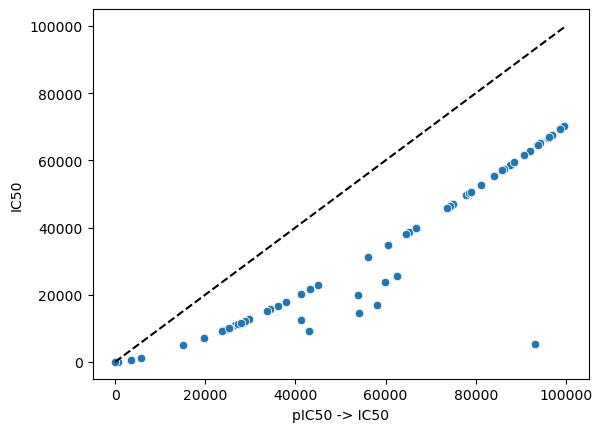

In [71]:
mers_pic50_minh_stdev_col = "MERS-CoV-MPro_fluorescence-dose-response_weizmann: Minh_Protease_MERS_Mpro_pIC50 (calc) (uM) Standard Deviation (±)"
mers_counts_col = "MERS-CoV-MPro_fluorescence-dose-response_weizmann: Minh_Protease_MERS_Mpro_pIC50 (calc) (uM) Count"
stderrs_pic50 = raw_df[mers_pic50_minh_stdev_col] / np.sqrt(raw_df[mers_counts_col])
stderrs_pic50_conv = np.power(10, -stderrs_pic50) / (10e-6)
stderrs_ic50 = (np.power(10, -raw_df[mers_pic50_minh_stdev_col]) / (10e-6)) / np.sqrt(raw_df[mers_counts_col])

ax = sns.scatterplot(x=stderrs_pic50_conv, y=stderrs_ic50)
ax.set_xlabel("pIC50 -> IC50")
ax.set_ylabel("IC50")
ax.plot([0, 100000], [0, 100000], ls="--", color="black")

In [4]:
len(test_smi)

297